In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from google.cloud import bigquery as bq

%matplotlib inline

In [2]:
hormone_expression_bigtable = pd.read_table("./datasets/hormone_expression_bigtable.IlluminaHiSeq.tsv", sep="\t")
print(hormone_expression_bigtable.shape)
hormone_expression_bigtable.head()

(53970, 19)


,case_barcode,sample_barcode,aliquot_barcode,gene_symbol,normalized_count,transformed_count,sample_type,sample_type_name,initial_response,recurrence_status,recurrence_log,subtype,ER,PR,Her2_IHC,Her2_ISH,Her2,triple_negative,subtype_sub
0,TCGA-5L-AAT0,TCGA-5L-AAT0-01A,TCGA-5L-AAT0-01A-12R-A41B-07,ADRA2C,39.8885,5.353623,1,Primary solid Tumor,Unknown,NaN,NaN,LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA
1,TCGA-5L-AAT0,TCGA-5L-AAT0-01A,TCGA-5L-AAT0-01A-12R-A41B-07,ANP32E,766.0947,9.583261,1,Primary solid Tumor,Unknown,NaN,NaN,LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA
2,TCGA-5L-AAT0,TCGA-5L-AAT0-01A,TCGA-5L-AAT0-01A-12R-A41B-07,ARL4C,993.6941,9.958109,1,Primary solid Tumor,Unknown,NaN,NaN,LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA
3,TCGA-5L-AAT0,TCGA-5L-AAT0-01A,TCGA-5L-AAT0-01A-12R-A41B-07,ASCL1,0.0000,0.000000,1,Primary solid Tumor,Unknown,NaN,NaN,LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA
4,TCGA-5L-AAT0,TCGA-5L-AAT0-01A,TCGA-5L-AAT0-01A-12R-A41B-07,ASS1,673.4125,9.397487,1,Primary solid Tumor,Unknown,NaN,NaN,LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA


In [3]:
print("Sample types")
print(hormone_expression_bigtable.drop_duplicates(subset="sample_barcode").sample_type_name.value_counts())
print("\n")

print("Cases - Initial responses")
print(hormone_expression_bigtable.drop_duplicates(subset="case_barcode").initial_response.value_counts())
print("\n")

print("Cases - Recurrence status")
print(hormone_expression_bigtable.drop_duplicates(subset="case_barcode").recurrence_status.value_counts())
print("\n")

print("Cases - Recurrence log")
print(hormone_expression_bigtable.drop_duplicates(subset="case_barcode").recurrence_log.value_counts())
print("\n")

Sample types
Primary solid Tumor    480
Solid Tissue Normal     33
Metastatic               1
Name: sample_type_name, dtype: int64


Cases - Initial responses
Unknown               431
Complete response      40
Progressive/Stable      9
Name: initial_response, dtype: int64


Cases - Recurrence status
Unknown     423
Occured      42
Low risk      8
Name: recurrence_status, dtype: int64


Cases - Recurrence log
Alive tumor free, last follow-up within risky period             376
New tumor after/during treatment                                  30
Drug start and end dates unknown                                  18
Dead with tumor                                                   12
Unknown neoplasm status                                           10
Dead tumor free during risky period                                9
Reported having tumor during follow-up but unknown recurrence      8
Alive tumor free after risky period                                8
Alive tumor free but unknown follow

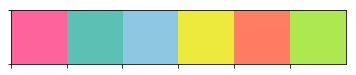

In [4]:
sns.palplot(sns.color_palette(["#ff639c", "#5bc1b5", "#8cc8e2", "#edea3d", "#ff7e63", "#aee851"]))

In [5]:
hormone_expression_bigtable.drop_duplicates(subset="aliquot_barcode")['sample_type_name'].unique()

array(['Primary solid Tumor', 'Solid Tissue Normal', 'Metastatic'],
      dtype=object)

In [6]:
hormone_expression_bigtable.drop_duplicates(subset="aliquot_barcode")['initial_response'].unique()

array(['Unknown', 'Complete response', 'Progressive/Stable'], dtype=object)

In [7]:
hormone_expression_bigtable.drop_duplicates(subset="aliquot_barcode")['recurrence_status'].unique()

array([nan, 'Unknown', 'Low risk', 'Occured'], dtype=object)

# Include normal
## Initial response

In [8]:
init_res = hormone_expression_bigtable.loc[hormone_expression_bigtable['initial_response'] != 'Unknown']
expression_matrix = init_res.pivot(index='gene_symbol', columns='aliquot_barcode', values='transformed_count')

print(expression_matrix.shape)
expression_matrix.head()

(105, 53)


aliquot_barcode,TCGA-A2-A0CO-01A-13R-A22K-07,TCGA-A2-A0CR-01A-11R-A22K-07,TCGA-A2-A0EP-01A-52R-A22U-07,TCGA-A2-A0EW-01A-21R-A115-07,TCGA-A2-A3Y0-01A-11R-A239-07,TCGA-A7-A3RF-01A-11R-A22K-07,TCGA-A7-A5ZX-01A-12R-A29R-07,TCGA-A8-A06R-01A-11R-A00Z-07,TCGA-A8-A07I-01A-11R-A00Z-07,TCGA-A8-A082-01A-11R-A00Z-07,...,TCGA-GM-A3XG-01A-31R-A24H-07,TCGA-GM-A3XN-01A-12R-A22U-07,TCGA-GM-A5PX-01A-12R-A28M-07,TCGA-LL-A50Y-01A-11R-A266-07,TCGA-LL-A73Z-01A-11R-A32P-07,TCGA-OL-A5S0-01A-11R-A28M-07,TCGA-S3-A6ZG-01A-22R-A32P-07,TCGA-S3-AA11-01A-31R-A41B-07,TCGA-V7-A7HQ-01A-11R-A33J-07,TCGA-WT-AB41-01A-11R-A41B-07
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ADRA2C,7.371518,7.262014,7.054130,6.048299,3.039805,7.731880,5.561949,7.884440,6.450045,8.328226,...,6.034394,6.992436,7.017541,4.633699,6.362245,5.938330,3.235696,6.970269,7.721103,9.522046
ANP32E,9.561221,9.829963,10.097180,9.781118,11.297024,8.128950,9.683484,8.871398,10.166508,9.805744,...,9.591270,10.365569,9.911534,9.741722,10.626102,10.873870,10.839075,9.483399,8.734465,10.252020
ARL4C,11.201284,11.275144,11.615422,10.084830,10.851740,8.161880,10.443259,10.215139,9.768760,8.460251,...,10.601978,10.394763,9.318223,8.375083,11.027117,10.840359,8.771351,8.256225,9.452429,10.910269
ASCL1,0.000000,0.000000,2.218626,0.000000,0.728312,7.424274,0.494876,0.000000,1.215927,1.137504,...,0.429750,3.925477,0.000000,0.000000,0.000000,1.598175,0.000000,0.000000,2.567229,7.767370
ASS1,10.769460,10.606733,11.081560,10.417837,13.210058,8.736559,9.835311,13.206704,6.562009,8.016808,...,10.780222,11.401248,10.859516,9.556013,11.773173,12.519634,7.586168,11.488817,12.288174,8.588975


In [9]:
color_matrix = pd.DataFrame()
df = init_res.drop_duplicates(subset="aliquot_barcode")

print(print(df['sample_type_name'].unique()))
print(df['initial_response'].unique())

['Primary solid Tumor' 'Solid Tissue Normal']
None
['Complete response' 'Progressive/Stable']


In [10]:
c = dict(zip(df['sample_type_name'].unique(), ["#ff639c", "#5bc1b5"]))
color_matrix['Sample types'] = df['sample_type_name'].map(c)

c = dict(zip(df['initial_response'].unique(), ["#8cc8e2", "#edea3d"]))
color_matrix['Initial response'] = df['initial_response'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Sample types,Initial response
aliquot_barcode,,
TCGA-A2-A0CO-01A-13R-A22K-07,#ff639c,#8cc8e2
TCGA-A2-A0CR-01A-11R-A22K-07,#ff639c,#8cc8e2
TCGA-A2-A0EP-01A-52R-A22U-07,#ff639c,#8cc8e2
TCGA-A2-A0EW-01A-21R-A115-07,#ff639c,#edea3d
TCGA-A2-A3Y0-01A-11R-A239-07,#ff639c,#8cc8e2


In [11]:
distance = scipy.spatial.distance.squareform(1-expression_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='weighted')

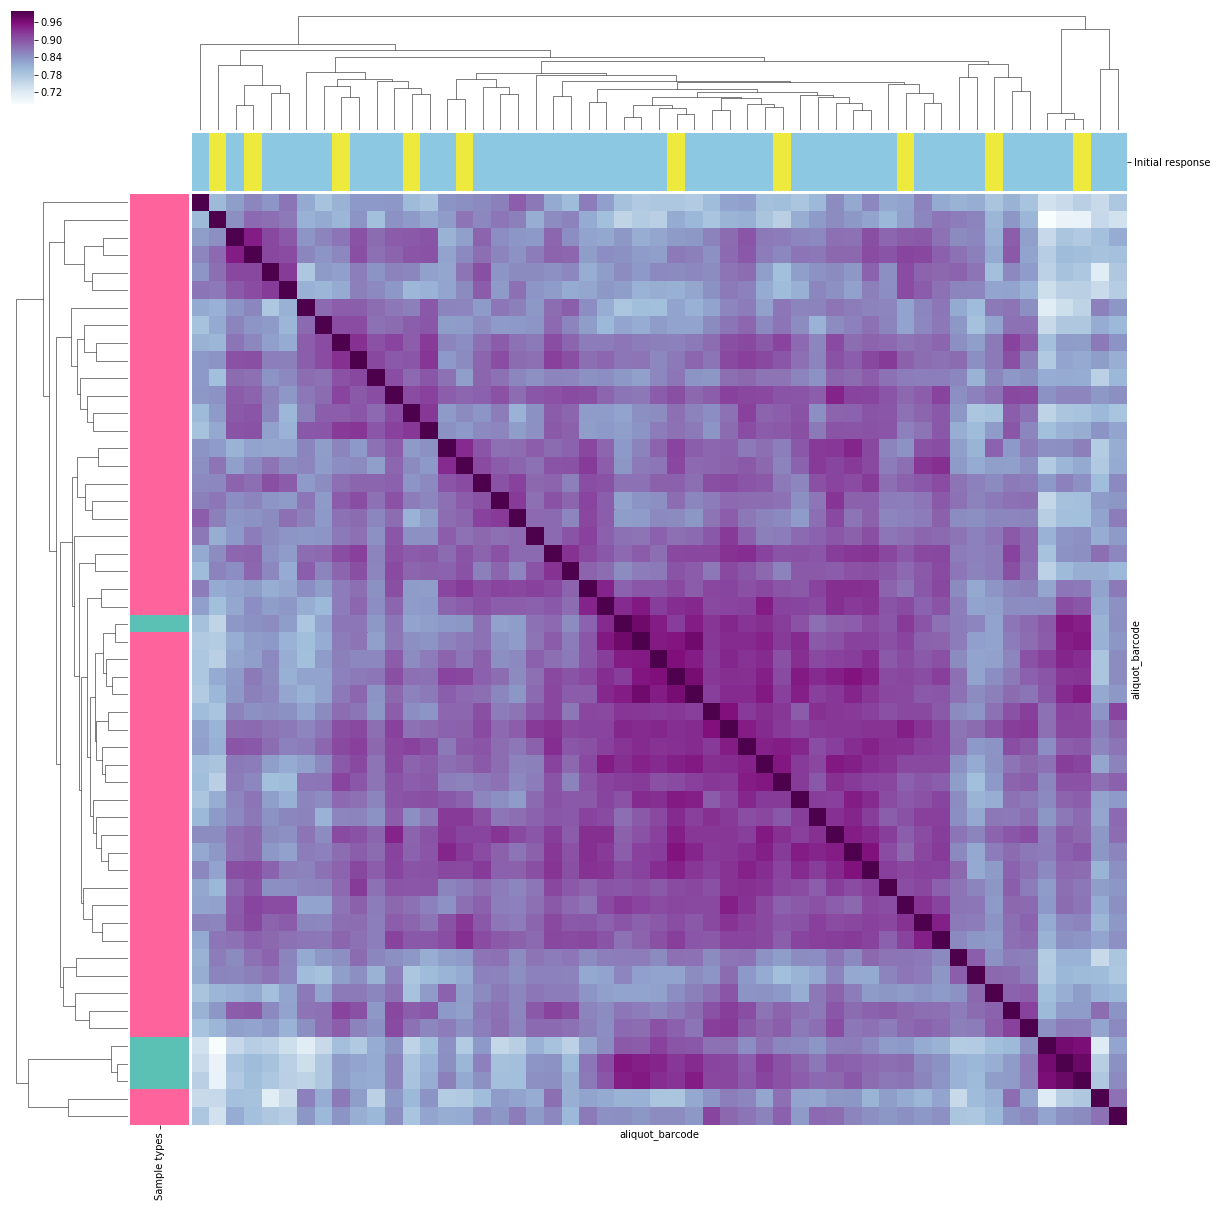

In [12]:
g = sns.clustermap(data=expression_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix['Sample types'], col_colors = color_matrix.iloc[:,1:],
                   cmap="BuPu", vmax=1, figsize=(20,20.5), 
                   xticklabels=False, yticklabels=False)

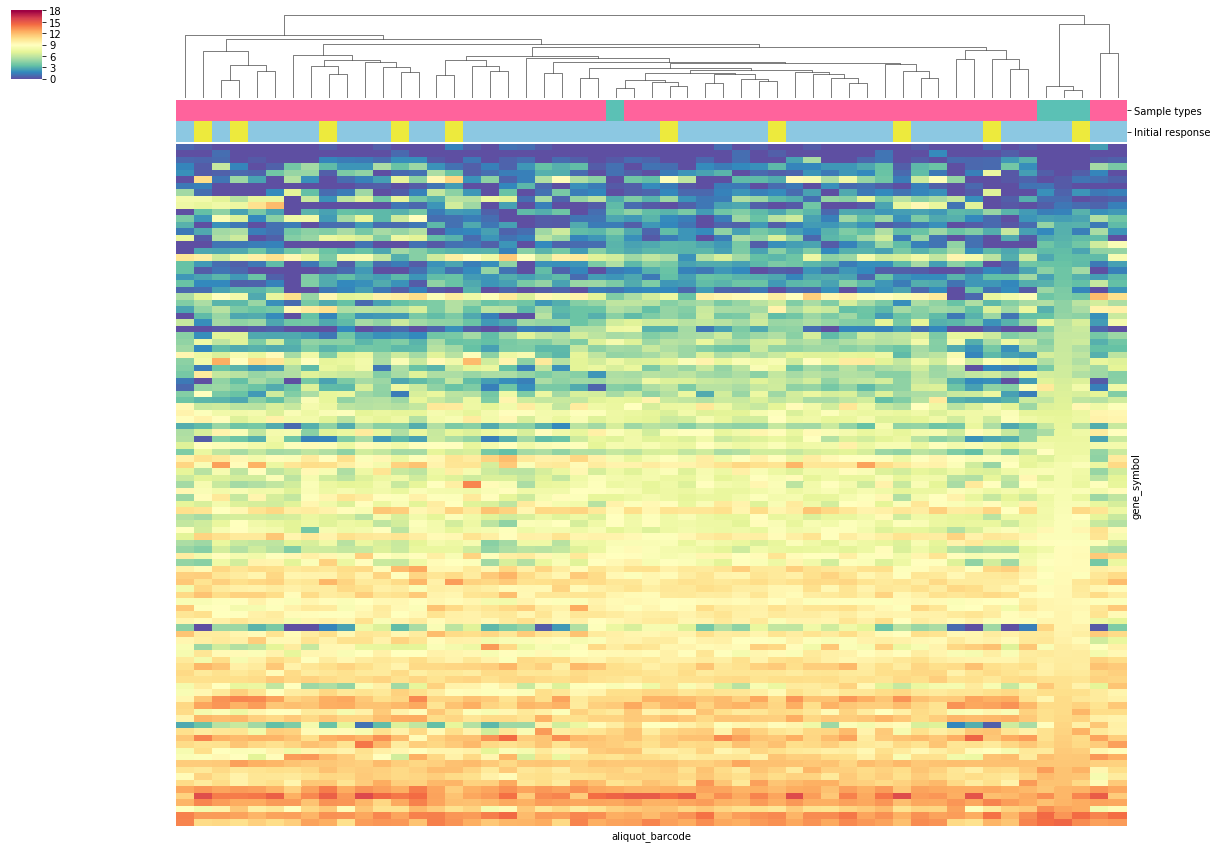

In [13]:
normal_aliquots = init_res.loc[(init_res['sample_type'] == 11), 'aliquot_barcode'].unique()

g1 = sns.clustermap(data=expression_matrix.sort_values(by=list(normal_aliquots)), 
                    col_linkage=linkage, row_cluster = False,
                    col_colors = color_matrix,
                    cmap="Spectral_r", vmin=0, vmax=18, figsize=(20,15), 
                    xticklabels=False, yticklabels=False)

In [14]:
g.savefig("./plots/cluster_expression.hormone.init_res.corrdata.png")
g1.savefig("./plots/cluster_expression.hormone.init_res.expressiondata.png")

## Recurrence status

In [15]:
recur = hormone_expression_bigtable.loc[(hormone_expression_bigtable['recurrence_status'] != 'Unknown') & 
                                     (hormone_expression_bigtable['recurrence_status'].isna() == False)]
expression_matrix = recur.pivot(index='gene_symbol', columns='aliquot_barcode', values='transformed_count')

print(expression_matrix.shape)
expression_matrix.head()

(105, 54)


aliquot_barcode,TCGA-A2-A04N-01A-11R-A115-07,TCGA-A2-A04V-01A-21R-A034-07,TCGA-A2-A0CK-01A-11R-A22K-07,TCGA-A2-A0EW-01A-21R-A115-07,TCGA-A2-A0SV-01A-11R-A084-07,TCGA-A2-A0SW-01A-11R-A084-07,TCGA-A2-A0YC-01A-11R-A109-07,TCGA-A2-A25B-01A-11R-A169-07,TCGA-A2-A25E-01A-11R-A169-07,TCGA-A7-A13E-01A-11R-A12P-07,...,TCGA-E9-A1NF-01A-11R-A14D-07,TCGA-E9-A1NF-11A-73R-A14D-07,TCGA-EW-A1P0-01A-11R-A144-07,TCGA-GM-A2D9-01A-11R-A18M-07,TCGA-GM-A2DA-01A-11R-A18M-07,TCGA-GM-A2DC-01A-11R-A18M-07,TCGA-GM-A2DM-01A-11R-A180-07,TCGA-GM-A2DN-01A-11R-A180-07,TCGA-LL-A73Z-01A-11R-A32P-07,TCGA-LQ-A4E4-01A-11R-A266-07
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ADRA2C,5.412802,4.444813,6.541038,6.048299,6.377509,3.352377,3.563158,2.848358,4.918639,1.832769,...,5.299666,6.964089,3.756084,6.580773,5.816973,9.217166,1.732313,4.037918,6.362245,6.689829
ANP32E,9.372962,10.669437,10.030458,9.781118,9.562843,9.542102,10.799081,11.367194,11.081927,11.732477,...,9.698123,9.802101,7.684026,9.453122,9.661606,10.929548,9.665320,10.816003,10.626102,9.658979
ARL4C,9.943622,9.345226,9.152490,10.084830,11.333493,9.840185,9.276834,9.365068,9.197618,10.415972,...,11.283361,10.381573,9.419215,9.322357,10.660715,8.938618,8.652597,9.851545,11.027117,7.734416
ASCL1,0.000000,0.859811,1.145417,0.000000,0.000000,2.025419,0.000000,1.445038,3.197881,0.000000,...,0.695281,0.939151,0.000000,2.416407,6.609313,12.127080,7.042671,1.550063,0.000000,0.583712
ASS1,10.309732,8.386607,10.685678,10.417837,11.599314,7.828981,8.429109,7.555266,7.217218,10.635957,...,10.840536,12.377656,13.220430,12.031642,9.843106,9.156216,7.706509,10.784490,11.773173,10.659422


In [16]:
color_matrix = pd.DataFrame()
df = recur.drop_duplicates(subset="aliquot_barcode")

print(print(df['sample_type_name'].unique()))
print(df['recurrence_status'].unique())

['Primary solid Tumor' 'Solid Tissue Normal']
None
['Low risk' 'Occured']


In [17]:
c = dict(zip(df['sample_type_name'].unique(), ["#ff639c", "#5bc1b5"]))
color_matrix['Sample types'] = df['sample_type_name'].map(c)

c = dict(zip(df['recurrence_status'].unique(), ["#aee851", "#ff7e63"]))
color_matrix['Recurrence status'] = df['recurrence_status'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Sample types,Recurrence status
aliquot_barcode,,
TCGA-A2-A04N-01A-11R-A115-07,#ff639c,#aee851
TCGA-A2-A04V-01A-21R-A034-07,#ff639c,#ff7e63
TCGA-A2-A0CK-01A-11R-A22K-07,#ff639c,#ff7e63
TCGA-A2-A0EW-01A-21R-A115-07,#ff639c,#ff7e63
TCGA-A2-A0SV-01A-11R-A084-07,#ff639c,#ff7e63


In [18]:
distance = scipy.spatial.distance.squareform(1-expression_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='weighted')

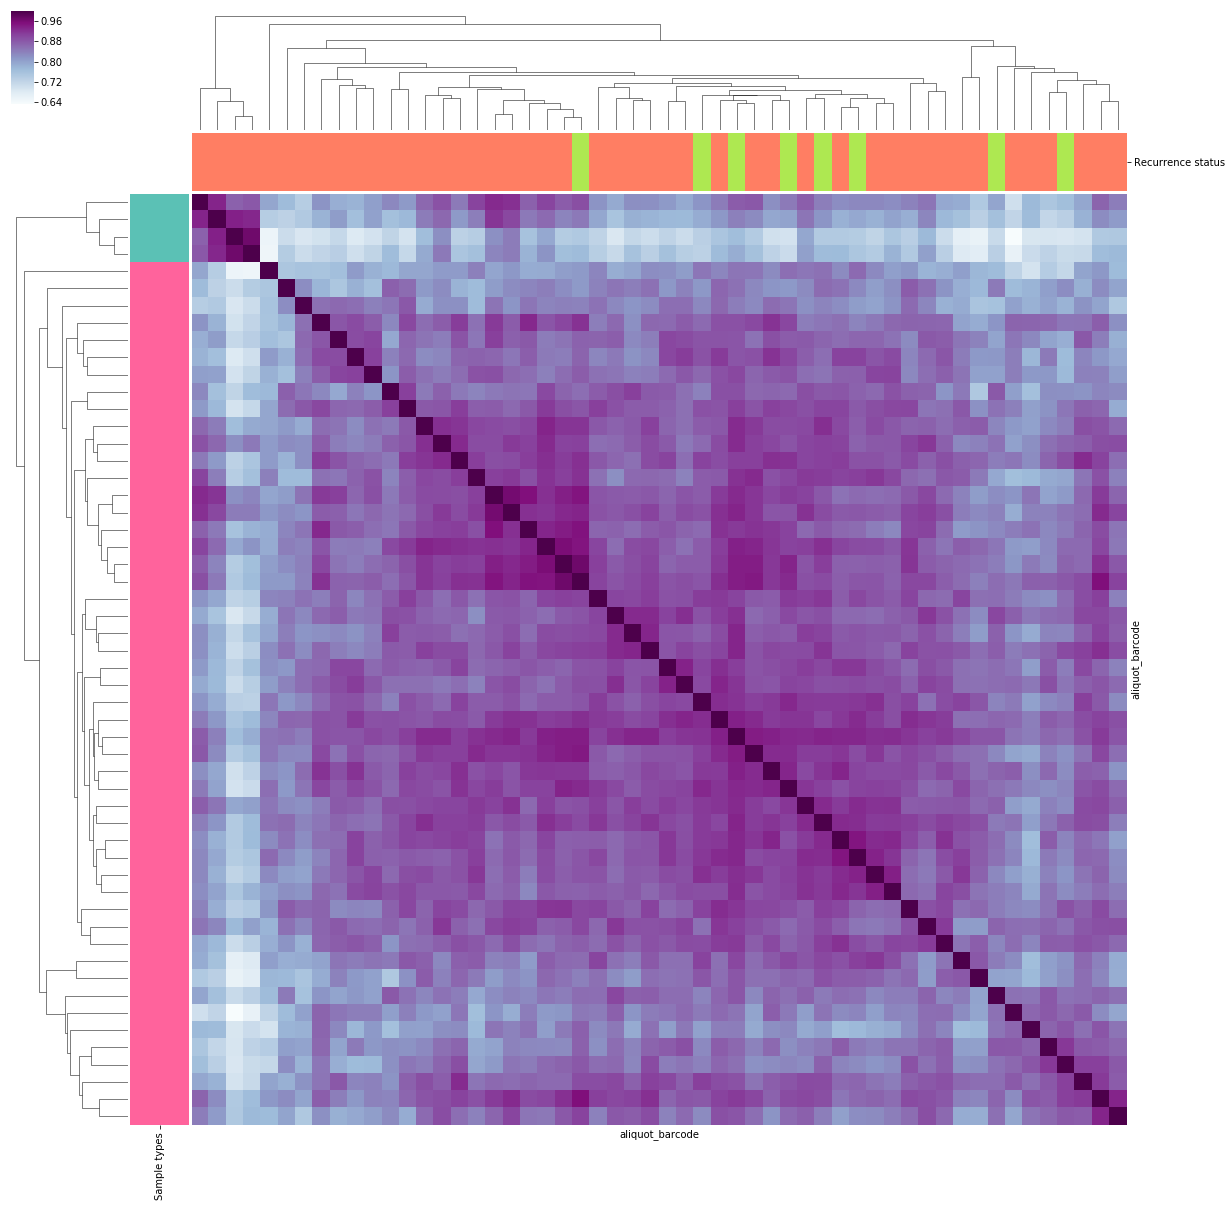

In [19]:
g2 = sns.clustermap(data=expression_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix['Sample types'], col_colors = color_matrix.iloc[:,1:],
                   cmap="BuPu", vmax=1, figsize=(20,20.5), 
                   xticklabels=False, yticklabels=False)

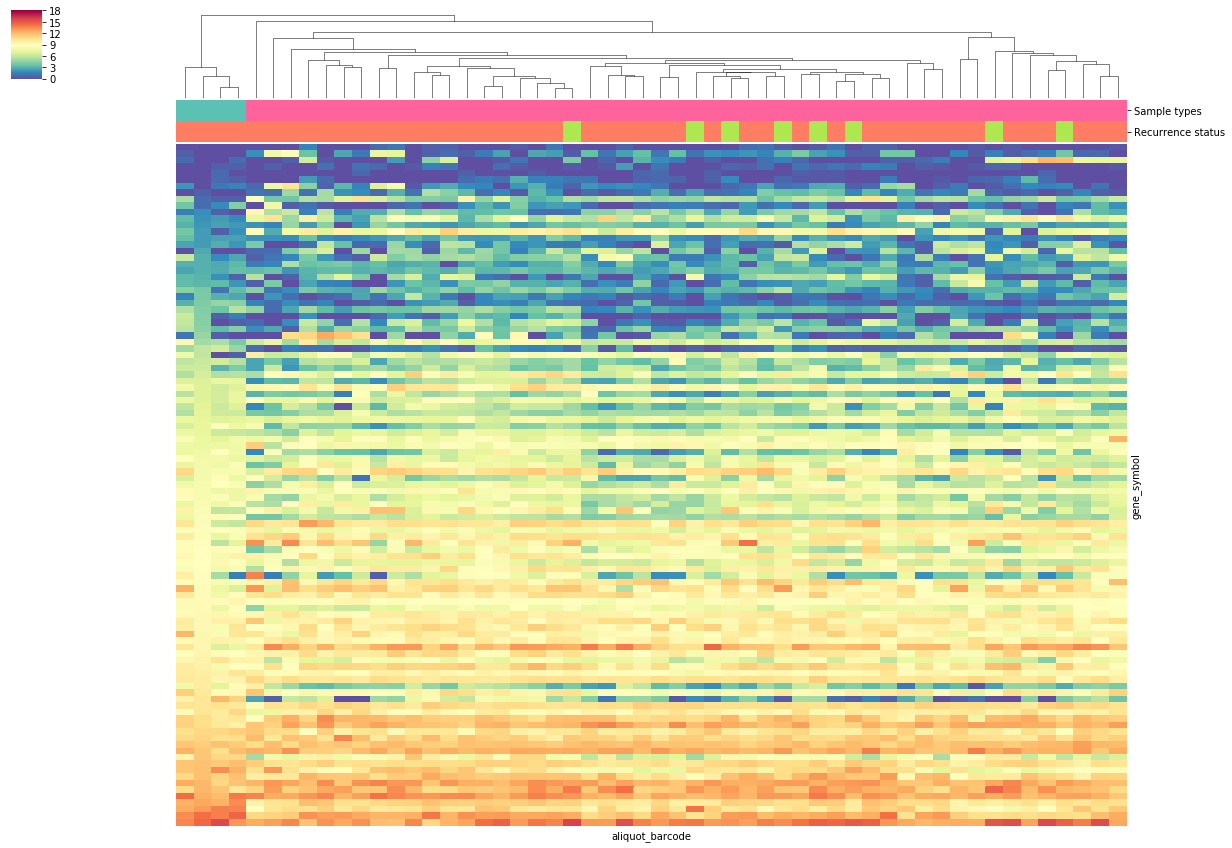

In [20]:
normal_aliquots = recur.loc[(recur['sample_type'] == 11), 'aliquot_barcode'].unique()

g3 = sns.clustermap(data=expression_matrix.sort_values(by=list(normal_aliquots)), 
                    col_linkage=linkage, row_cluster = False,
                    col_colors = color_matrix,
                    cmap="Spectral_r", vmin=0, vmax=18, figsize=(20,15), 
                    xticklabels=False, yticklabels=False)

In [21]:
g2.savefig("./plots/cluster_expression.hormone.recur.corrdata.png")
g3.savefig("./plots/cluster_expression.hormone.recur.expressiondata.png")

# Exclude normal
## Initial response

In [8]:
init_res = hormone_expression_bigtable.loc[(hormone_expression_bigtable['sample_type'] == 1) & 
                                     (hormone_expression_bigtable['initial_response'] != 'Unknown')]
expression_matrix = init_res.pivot(index='gene_symbol', columns='aliquot_barcode', values='transformed_count')

print(expression_matrix.shape)
expression_matrix.head()

(105, 49)


aliquot_barcode,TCGA-A2-A0CO-01A-13R-A22K-07,TCGA-A2-A0CR-01A-11R-A22K-07,TCGA-A2-A0EP-01A-52R-A22U-07,TCGA-A2-A0EW-01A-21R-A115-07,TCGA-A2-A3Y0-01A-11R-A239-07,TCGA-A7-A3RF-01A-11R-A22K-07,TCGA-A7-A5ZX-01A-12R-A29R-07,TCGA-A8-A06R-01A-11R-A00Z-07,TCGA-A8-A07I-01A-11R-A00Z-07,TCGA-A8-A082-01A-11R-A00Z-07,...,TCGA-GM-A3XG-01A-31R-A24H-07,TCGA-GM-A3XN-01A-12R-A22U-07,TCGA-GM-A5PX-01A-12R-A28M-07,TCGA-LL-A50Y-01A-11R-A266-07,TCGA-LL-A73Z-01A-11R-A32P-07,TCGA-OL-A5S0-01A-11R-A28M-07,TCGA-S3-A6ZG-01A-22R-A32P-07,TCGA-S3-AA11-01A-31R-A41B-07,TCGA-V7-A7HQ-01A-11R-A33J-07,TCGA-WT-AB41-01A-11R-A41B-07
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ADRA2C,7.371518,7.262014,7.054130,6.048299,3.039805,7.731880,5.561949,7.884440,6.450045,8.328226,...,6.034394,6.992436,7.017541,4.633699,6.362245,5.938330,3.235696,6.970269,7.721103,9.522046
ANP32E,9.561221,9.829963,10.097180,9.781118,11.297024,8.128950,9.683484,8.871398,10.166508,9.805744,...,9.591270,10.365569,9.911534,9.741722,10.626102,10.873870,10.839075,9.483399,8.734465,10.252020
ARL4C,11.201284,11.275144,11.615422,10.084830,10.851740,8.161880,10.443259,10.215139,9.768760,8.460251,...,10.601978,10.394763,9.318223,8.375083,11.027117,10.840359,8.771351,8.256225,9.452429,10.910269
ASCL1,0.000000,0.000000,2.218626,0.000000,0.728312,7.424274,0.494876,0.000000,1.215927,1.137504,...,0.429750,3.925477,0.000000,0.000000,0.000000,1.598175,0.000000,0.000000,2.567229,7.767370
ASS1,10.769460,10.606733,11.081560,10.417837,13.210058,8.736559,9.835311,13.206704,6.562009,8.016808,...,10.780222,11.401248,10.859516,9.556013,11.773173,12.519634,7.586168,11.488817,12.288174,8.588975


In [9]:
color_matrix = pd.DataFrame()
df = init_res.drop_duplicates(subset="aliquot_barcode")

print(df['initial_response'].unique())

['Complete response' 'Progressive/Stable']


In [10]:
c = dict(zip(df['initial_response'].unique(), ["#8cc8e2", "#edea3d"]))
color_matrix['Initial response'] = df['initial_response'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Initial response
aliquot_barcode,
TCGA-A2-A0CO-01A-13R-A22K-07,#8cc8e2
TCGA-A2-A0CR-01A-11R-A22K-07,#8cc8e2
TCGA-A2-A0EP-01A-52R-A22U-07,#8cc8e2
TCGA-A2-A0EW-01A-21R-A115-07,#edea3d
TCGA-A2-A3Y0-01A-11R-A239-07,#8cc8e2


In [11]:
distance = scipy.spatial.distance.squareform(1-expression_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='complete')

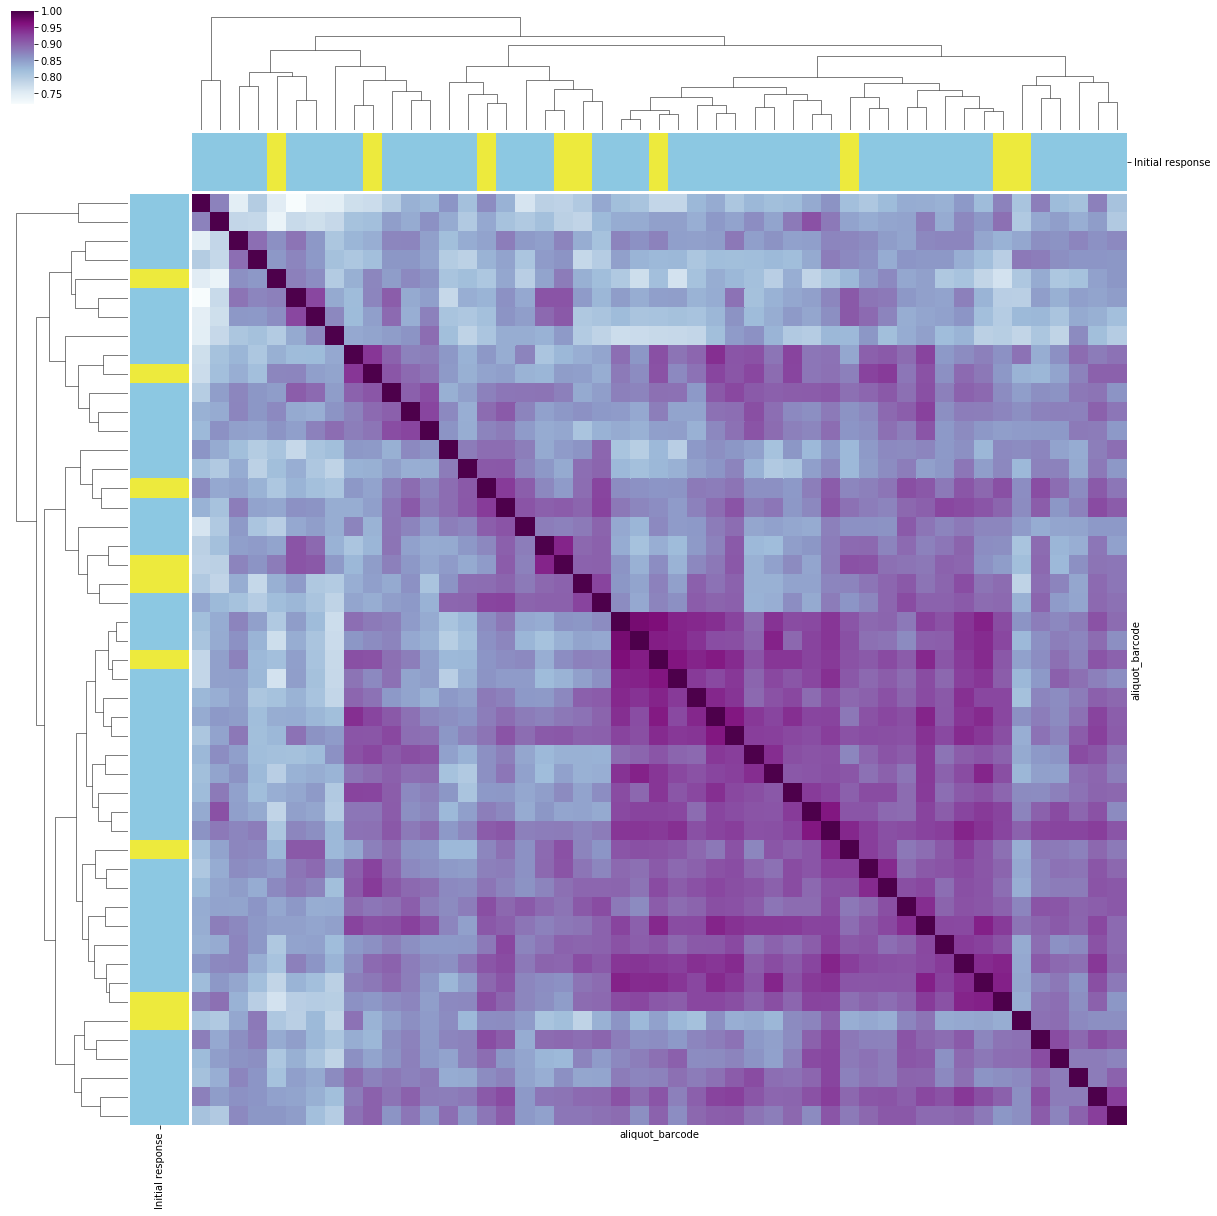

In [12]:
g4 = sns.clustermap(data=expression_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix, col_colors = color_matrix,
                   cmap="BuPu", vmax=1, figsize=(20,20.5), 
                   xticklabels=False, yticklabels=False)

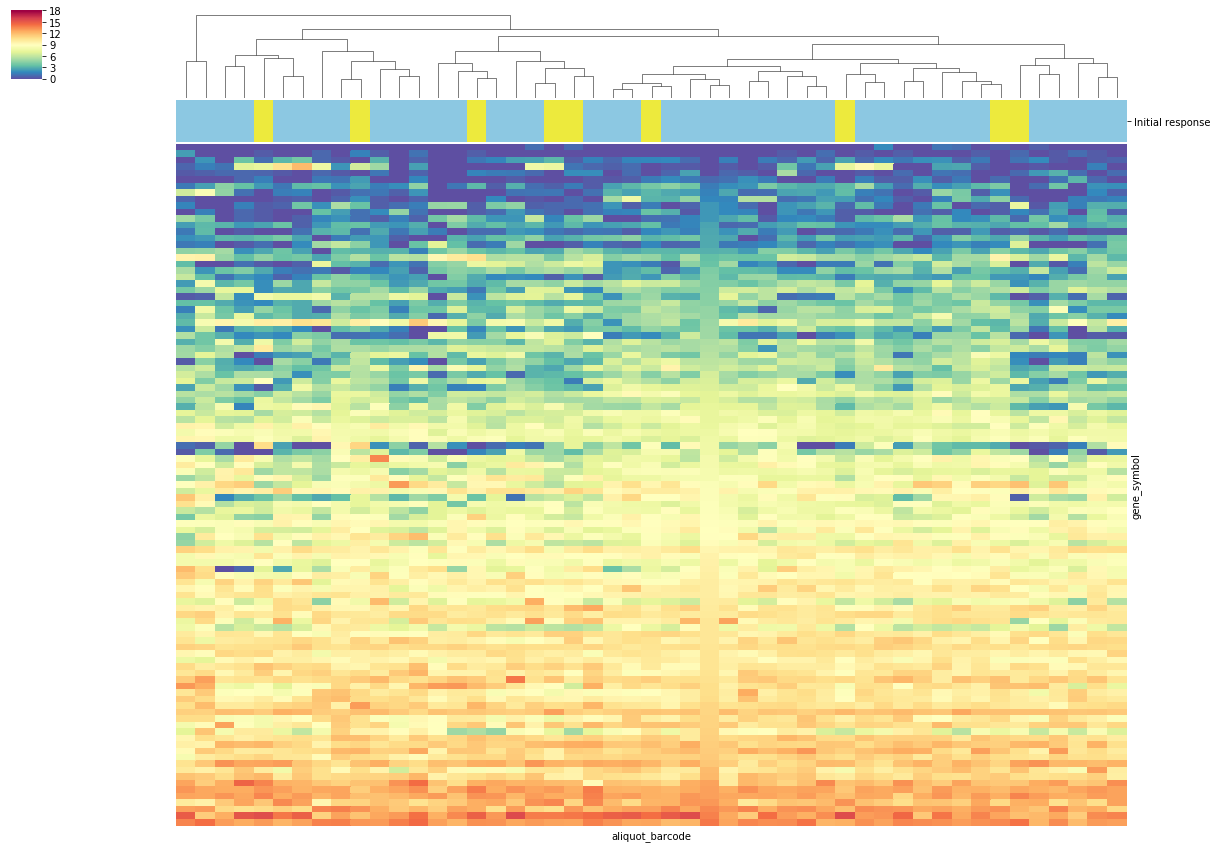

In [13]:
complete_aliquots = init_res.loc[(init_res['initial_response'] == 'Complete response'), 'aliquot_barcode'].unique()

g5 = sns.clustermap(data=expression_matrix.sort_values(by=list(complete_aliquots)), 
                    col_linkage=linkage, row_cluster = False,
                    col_colors = color_matrix,
                    cmap="Spectral_r", vmin=0, vmax=18, figsize=(20,15), 
                    xticklabels=False, yticklabels=False)

In [14]:
g4.savefig("./plots/cluster_expression.hormone.excl_norm.init_res.corrdata.png")
g5.savefig("./plots/cluster_expression.hormone.excl_norm.init_res.expressiondata.png")

## Recurrence status

In [15]:
recur = hormone_expression_bigtable.loc[(hormone_expression_bigtable['sample_type'] == 1) & 
                                  (hormone_expression_bigtable['recurrence_status'] != 'Unknown') & 
                                  (hormone_expression_bigtable['recurrence_status'].isna() == False)]
expression_matrix = recur.pivot(index='gene_symbol', columns='aliquot_barcode', values='transformed_count')

print(expression_matrix.shape)
expression_matrix.head()

(105, 50)


aliquot_barcode,TCGA-A2-A04N-01A-11R-A115-07,TCGA-A2-A04V-01A-21R-A034-07,TCGA-A2-A0CK-01A-11R-A22K-07,TCGA-A2-A0EW-01A-21R-A115-07,TCGA-A2-A0SV-01A-11R-A084-07,TCGA-A2-A0SW-01A-11R-A084-07,TCGA-A2-A0YC-01A-11R-A109-07,TCGA-A2-A25B-01A-11R-A169-07,TCGA-A2-A25E-01A-11R-A169-07,TCGA-A7-A13E-01A-11R-A12P-07,...,TCGA-E9-A1N6-01A-11R-A144-07,TCGA-E9-A1NF-01A-11R-A14D-07,TCGA-EW-A1P0-01A-11R-A144-07,TCGA-GM-A2D9-01A-11R-A18M-07,TCGA-GM-A2DA-01A-11R-A18M-07,TCGA-GM-A2DC-01A-11R-A18M-07,TCGA-GM-A2DM-01A-11R-A180-07,TCGA-GM-A2DN-01A-11R-A180-07,TCGA-LL-A73Z-01A-11R-A32P-07,TCGA-LQ-A4E4-01A-11R-A266-07
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ADRA2C,5.412802,4.444813,6.541038,6.048299,6.377509,3.352377,3.563158,2.848358,4.918639,1.832769,...,4.355961,5.299666,3.756084,6.580773,5.816973,9.217166,1.732313,4.037918,6.362245,6.689829
ANP32E,9.372962,10.669437,10.030458,9.781118,9.562843,9.542102,10.799081,11.367194,11.081927,11.732477,...,10.063238,9.698123,7.684026,9.453122,9.661606,10.929548,9.665320,10.816003,10.626102,9.658979
ARL4C,9.943622,9.345226,9.152490,10.084830,11.333493,9.840185,9.276834,9.365068,9.197618,10.415972,...,10.125916,11.283361,9.419215,9.322357,10.660715,8.938618,8.652597,9.851545,11.027117,7.734416
ASCL1,0.000000,0.859811,1.145417,0.000000,0.000000,2.025419,0.000000,1.445038,3.197881,0.000000,...,0.000000,0.695281,0.000000,2.416407,6.609313,12.127080,7.042671,1.550063,0.000000,0.583712
ASS1,10.309732,8.386607,10.685678,10.417837,11.599314,7.828981,8.429109,7.555266,7.217218,10.635957,...,12.100029,10.840536,13.220430,12.031642,9.843106,9.156216,7.706509,10.784490,11.773173,10.659422


In [16]:
color_matrix = pd.DataFrame()
df = recur.drop_duplicates(subset="aliquot_barcode")

print(df['recurrence_status'].unique())

['Low risk' 'Occured']


In [17]:
c = dict(zip(df['recurrence_status'].unique(), ["#aee851", "#ff7e63"]))
color_matrix['Recurrence status'] = df['recurrence_status'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Recurrence status
aliquot_barcode,
TCGA-A2-A04N-01A-11R-A115-07,#aee851
TCGA-A2-A04V-01A-21R-A034-07,#ff7e63
TCGA-A2-A0CK-01A-11R-A22K-07,#ff7e63
TCGA-A2-A0EW-01A-21R-A115-07,#ff7e63
TCGA-A2-A0SV-01A-11R-A084-07,#ff7e63


In [18]:
distance = scipy.spatial.distance.squareform(1-expression_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='complete')

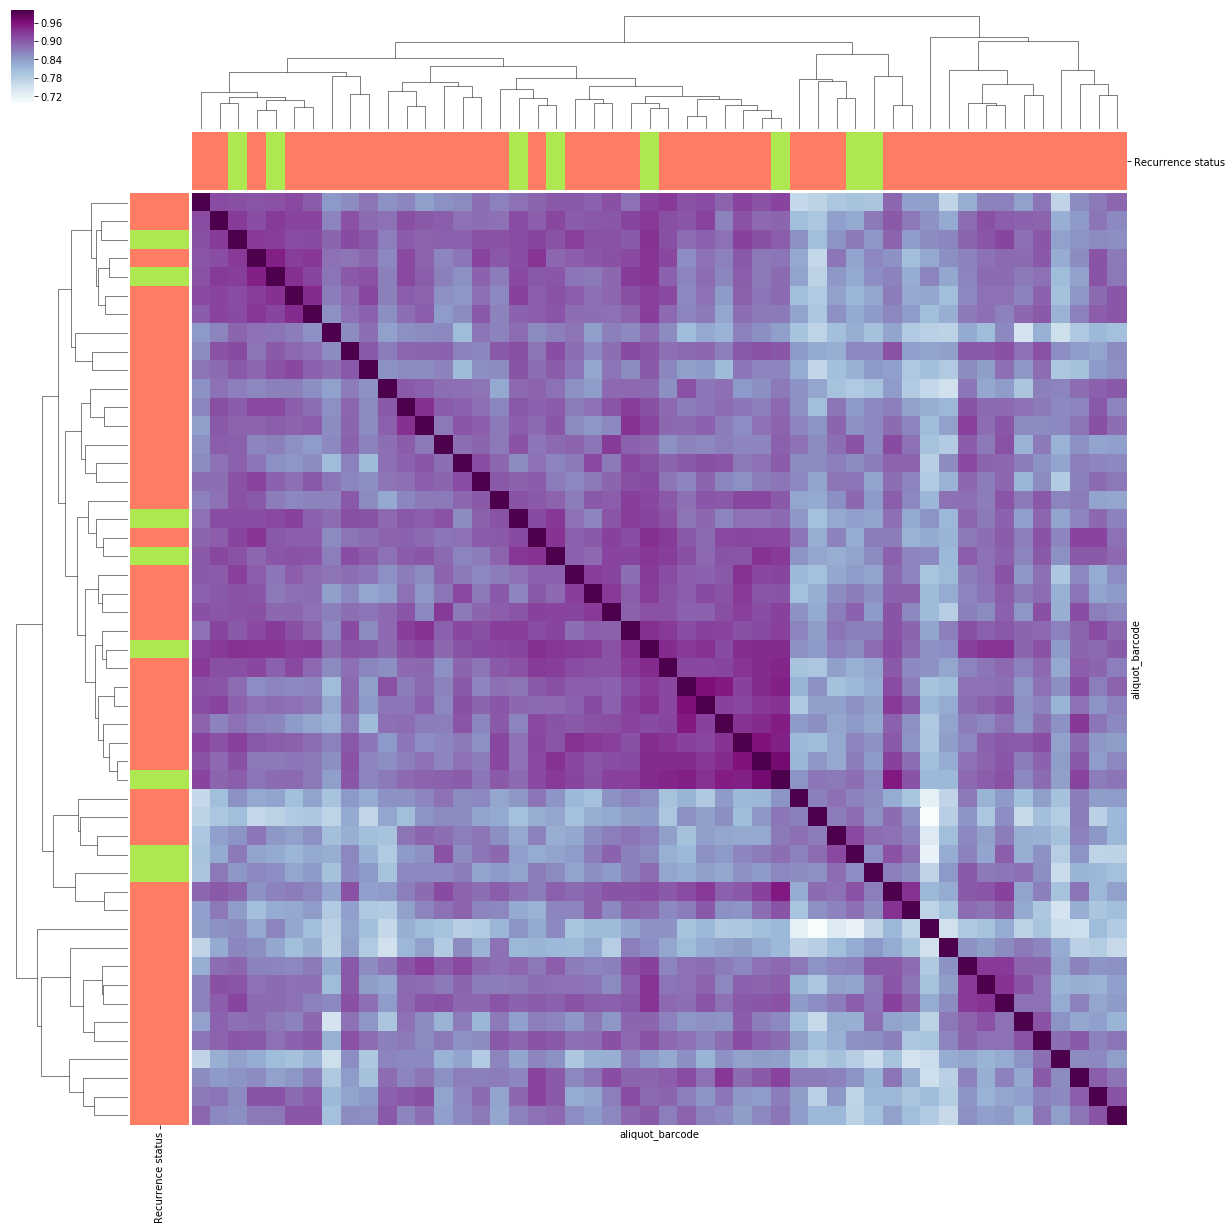

In [19]:
g6 = sns.clustermap(data=expression_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix, col_colors = color_matrix,
                   cmap="BuPu", vmax=1, figsize=(20,20.5), 
                   xticklabels=False, yticklabels=False)

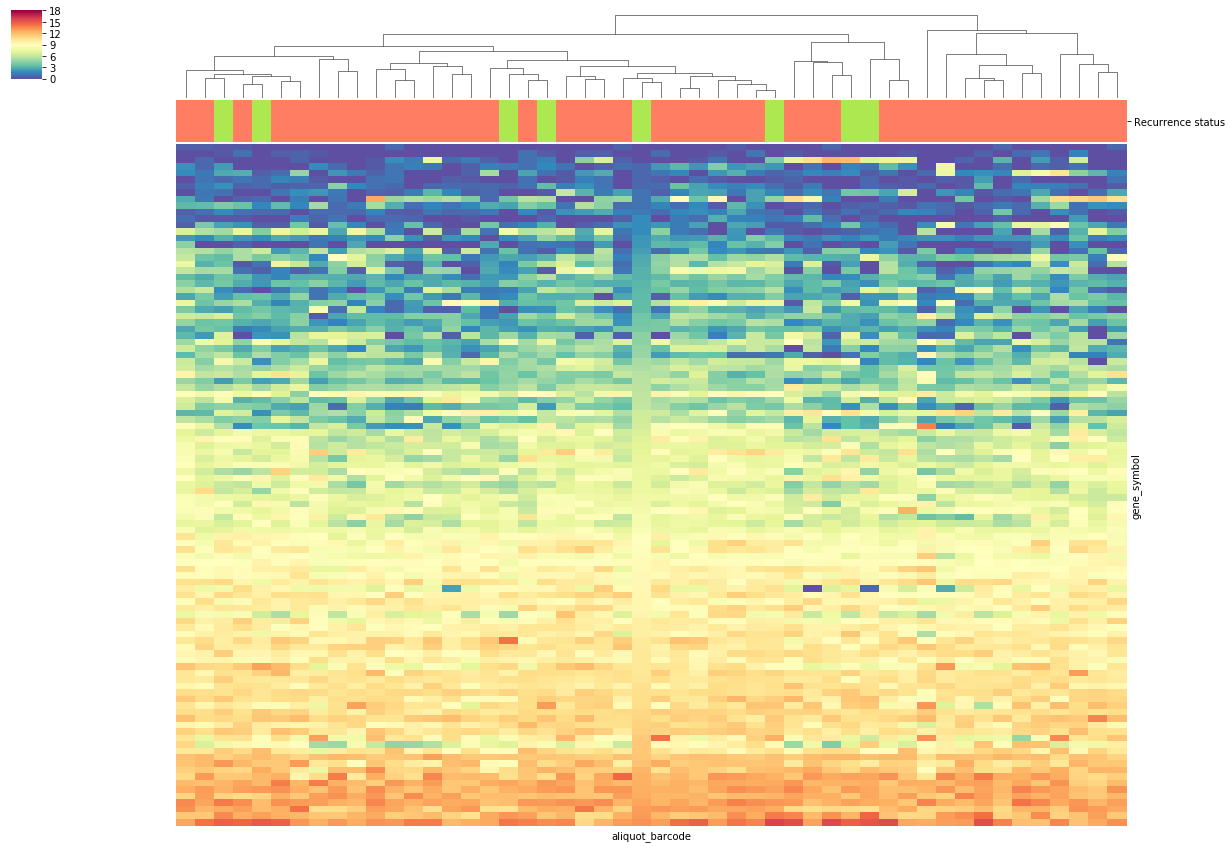

In [20]:
lowrisk_aliquots = recur.loc[(recur['recurrence_status'] == 'Low risk'), 'aliquot_barcode'].unique()

g7 = sns.clustermap(data=expression_matrix.sort_values(by=list(lowrisk_aliquots)), 
                    col_linkage=linkage, row_cluster = False,
                   col_colors = color_matrix,
                   cmap="Spectral_r", vmin=0, vmax=18, figsize=(20,15), 
                   xticklabels=False, yticklabels=False)

In [21]:
g6.savefig("./plots/cluster_expression.hormone.excl_norm.recur.corrdata.png")
g7.savefig("./plots/cluster_expression.hormone.excl_norm.recur.expressiondata.png")

## Complete + Low-risk vs. Progressive/Stable + Relapsed

In [22]:
restricted = hormone_expression_bigtable.loc[(hormone_expression_bigtable['sample_type'] == 1) &
                                             (hormone_expression_bigtable['recurrence_status'] != 'Unknown') & 
                                             (hormone_expression_bigtable['recurrence_status'].isna() == False) & 
                                             (hormone_expression_bigtable['initial_response'] != 'Unknown')]
expression_matrix = restricted.pivot(index='gene_symbol', columns='aliquot_barcode', values='transformed_count')

print(expression_matrix.shape)
expression_matrix.head()

(105, 11)


aliquot_barcode,TCGA-A2-A0EW-01A-21R-A115-07,TCGA-A7-A3RF-01A-11R-A22K-07,TCGA-A8-A08O-01A-21R-A056-07,TCGA-D8-A73W-01A-22R-A352-07,TCGA-E2-A1IE-01A-11R-A13Q-07,TCGA-E9-A1N6-01A-11R-A144-07,TCGA-GM-A2DA-01A-11R-A18M-07,TCGA-GM-A2DC-01A-11R-A18M-07,TCGA-GM-A2DM-01A-11R-A180-07,TCGA-GM-A2DN-01A-11R-A180-07,TCGA-LL-A73Z-01A-11R-A32P-07
gene_symbol,,,,,,,,,,,
ADRA2C,6.048299,7.731880,3.403309,3.350115,8.306813,4.355961,5.816973,9.217166,1.732313,4.037918,6.362245
ANP32E,9.781118,8.128950,10.356002,9.623196,8.359199,10.063238,9.661606,10.929548,9.665320,10.816003,10.626102
ARL4C,10.084830,8.161880,9.864767,9.603949,7.748289,10.125916,10.660715,8.938618,8.652597,9.851545,11.027117
ASCL1,0.000000,7.424274,7.420915,0.000000,7.618956,0.000000,6.609313,12.127080,7.042671,1.550063,0.000000
ASS1,10.417837,8.736559,8.507015,11.840373,9.038086,12.100029,9.843106,9.156216,7.706509,10.784490,11.773173


In [23]:
color_matrix = pd.DataFrame()
df = restricted.drop_duplicates(subset="aliquot_barcode")

print(df['initial_response'].unique())
print(df['recurrence_status'].unique())

['Progressive/Stable' 'Complete response']
['Occured' 'Low risk']


In [24]:
pd.crosstab(df['initial_response'], df['recurrence_status'], margins=True)

recurrence_status,Low risk,Occured,All
initial_response,,,
Complete response,3,0,3
Progressive/Stable,0,8,8
All,3,8,11


In [25]:
df['subtype_sub'].value_counts()

LumA      9
Normal    1
LumB      1
Name: subtype_sub, dtype: int64

In [26]:
c = dict(zip(df['initial_response'].unique(), ["#edea3d", "#8cc8e2"]))
color_matrix['Initial response'] = df['initial_response'].map(c)

c = dict(zip(df['recurrence_status'].unique(), ["#ff7e63", "#aee851"]))
color_matrix['Recurrence status'] = df['recurrence_status'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Initial response,Recurrence status
aliquot_barcode,,
TCGA-A2-A0EW-01A-21R-A115-07,#edea3d,#ff7e63
TCGA-A7-A3RF-01A-11R-A22K-07,#edea3d,#ff7e63
TCGA-A8-A08O-01A-21R-A056-07,#edea3d,#ff7e63
TCGA-D8-A73W-01A-22R-A352-07,#edea3d,#ff7e63
TCGA-E2-A1IE-01A-11R-A13Q-07,#edea3d,#ff7e63


In [27]:
distance = scipy.spatial.distance.squareform(1-expression_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='complete')

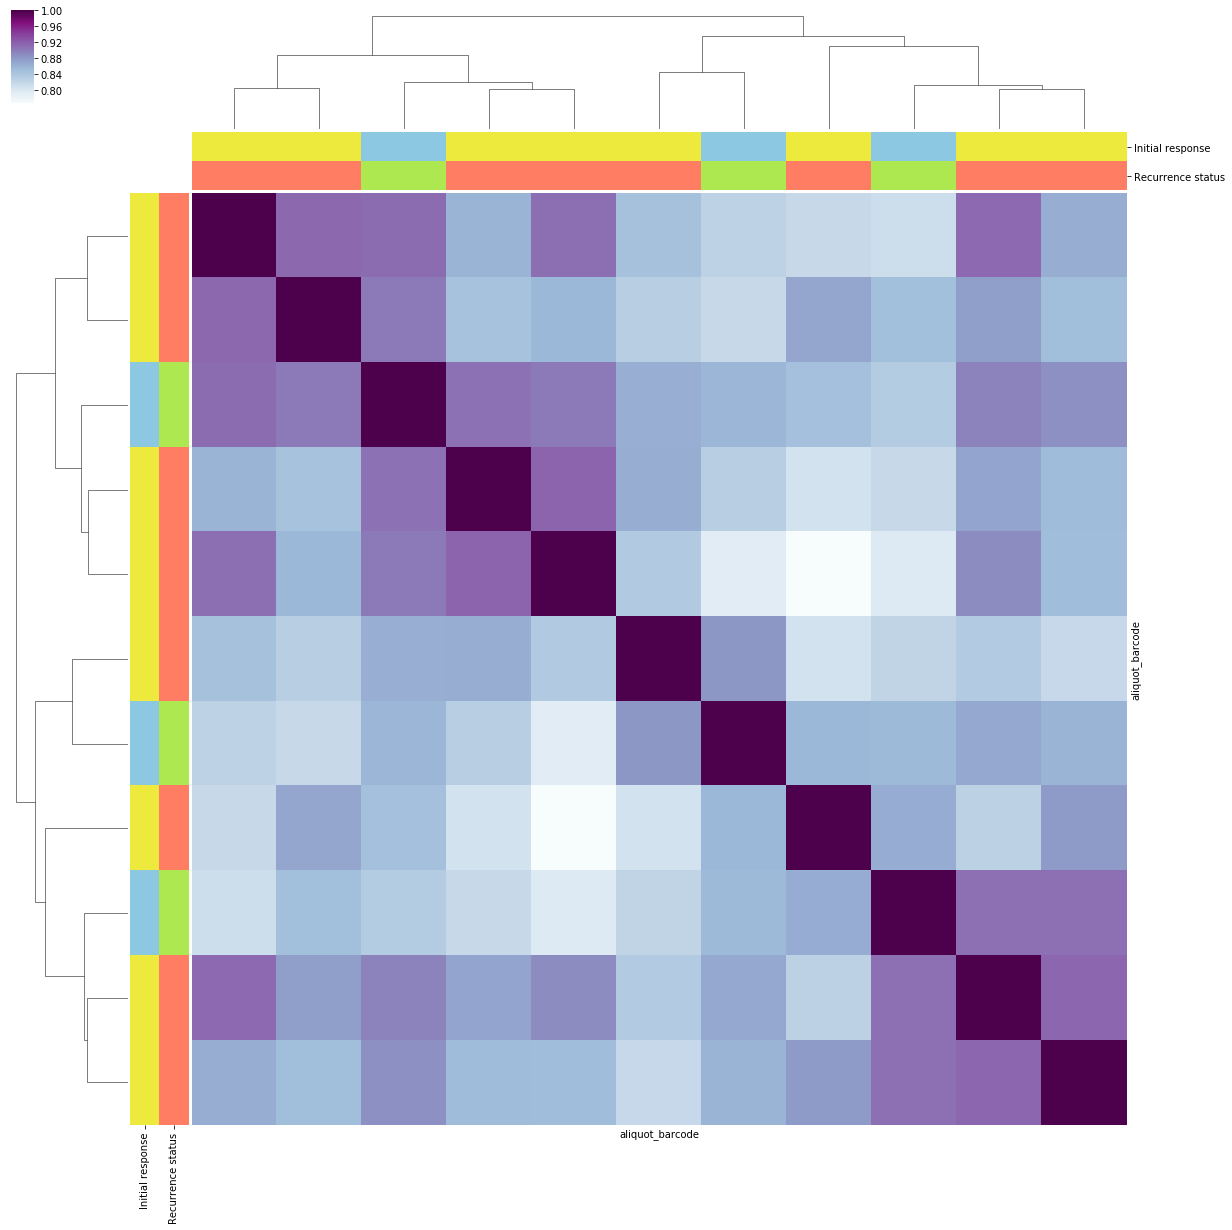

In [28]:
g8 = sns.clustermap(data=expression_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix, col_colors = color_matrix,
                   cmap="BuPu", vmax=1, figsize=(20,20.5), 
                   xticklabels=False, yticklabels=False)

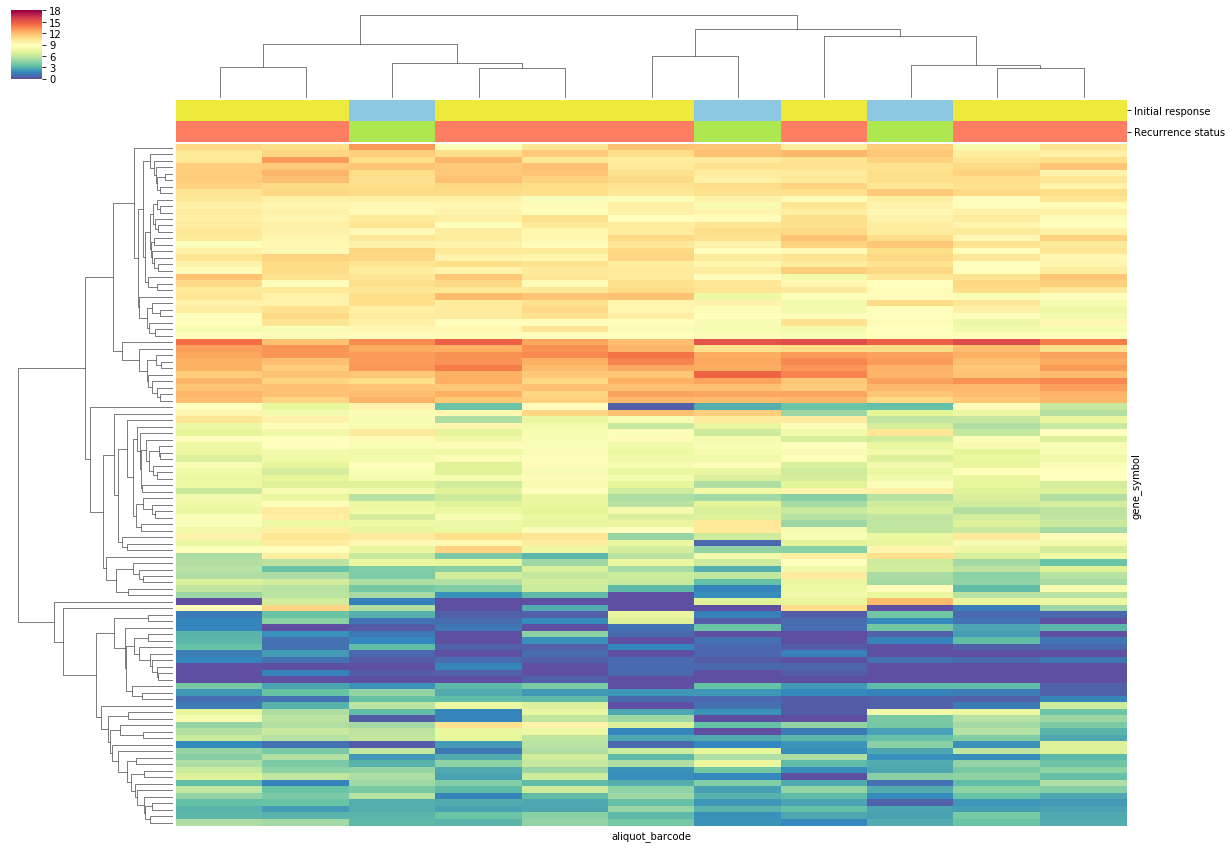

In [29]:
g9 = sns.clustermap(data=expression_matrix, col_linkage=linkage, row_cluster = True,
                   col_colors = color_matrix,
                   cmap="Spectral_r", vmin=0, vmax=18, figsize=(20,15), 
                   xticklabels=False, yticklabels=False)

In [30]:
g8.savefig("./plots/cluster_expression.hormone.excl_norm.init_recur.corrdata.png")
g9.savefig("./plots/cluster_expression.hormone.excl_norm.init_recur.expressiondata.png")

# Normal tissues only

In [31]:
only_normal = hormone_expression_bigtable.loc[hormone_expression_bigtable['sample_type'] == 11]
expression_matrix = only_normal.pivot(index='gene_symbol', columns='aliquot_barcode', values='transformed_count')

print(expression_matrix.shape)
expression_matrix.head()

(105, 33)


aliquot_barcode,TCGA-A7-A0D9-11A-53R-A089-07,TCGA-A7-A0DB-11A-33R-A089-07,TCGA-A7-A0DC-11A-41R-A089-07,TCGA-A7-A13E-11A-61R-A12P-07,TCGA-A7-A13F-11A-42R-A12P-07,TCGA-A7-A13G-11A-51R-A13Q-07,TCGA-AC-A2FB-11A-13R-A17B-07,TCGA-AC-A2FF-11A-13R-A17B-07,TCGA-BH-A0AY-11A-23R-A089-07,TCGA-BH-A0B8-11A-41R-A089-07,...,TCGA-E2-A15I-11A-32R-A137-07,TCGA-E2-A15M-11A-22R-A12D-07,TCGA-E2-A1BC-11A-32R-A12P-07,TCGA-E2-A1IG-11A-22R-A144-07,TCGA-E9-A1N4-11A-33R-A14M-07,TCGA-E9-A1N5-11A-41R-A14D-07,TCGA-E9-A1N6-11A-32R-A144-07,TCGA-E9-A1NA-11A-33R-A144-07,TCGA-E9-A1NF-11A-73R-A14D-07,TCGA-E9-A1NG-11A-52R-A14M-07
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ADRA2C,6.329656,6.743967,6.864976,7.144808,6.970193,6.356271,6.366060,4.812837,6.362896,7.268351,...,5.563994,6.956900,7.397868,6.828312,4.808848,3.919521,6.025831,7.216198,6.964089,6.686049
ANP32E,9.166989,9.995184,10.141016,9.352723,9.274543,9.842412,10.110755,10.216136,10.049434,9.778098,...,10.063120,9.904411,9.728791,9.761114,10.287002,10.471928,10.118482,9.656397,9.802101,9.977503
ARL4C,8.767611,10.130703,10.140420,9.503859,10.967476,8.462580,10.936821,10.199774,10.500236,8.785992,...,8.968092,10.356491,8.200677,10.688131,11.566673,10.967478,12.274797,10.481395,10.381573,10.756167
ASCL1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.323889,3.392496,0.902730,0.000000,...,0.000000,0.000000,0.000000,0.612400,0.672652,1.593975,0.948451,0.000000,0.939151,0.533264
ASS1,12.687534,12.728685,11.819102,11.891328,12.505365,13.559786,11.637454,10.486406,11.447914,12.638608,...,13.182231,11.257493,14.838582,11.990911,11.092244,11.083869,11.737176,12.386615,12.377656,11.968884


In [32]:
expression_matrix.corr().min().min()

0.7485735068608894

In [33]:
color_matrix = pd.DataFrame()
df = only_normal.drop_duplicates(subset="aliquot_barcode")

print(df['initial_response'].unique())
print(df['recurrence_status'].unique())

['Unknown' 'Complete response' 'Progressive/Stable']
['Unknown' 'Occured']


In [34]:
c = dict(zip(df['initial_response'].unique(), ["#ffffff", "#8cc8e2", "#edea3d"]))
color_matrix['Initial response'] = df['initial_response'].map(c)

c = dict(zip(df['recurrence_status'].unique(), ["#ffffff", "#ff7e63"]))
color_matrix['Recurrence status'] = df['recurrence_status'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Initial response,Recurrence status
aliquot_barcode,,
TCGA-A7-A0D9-11A-53R-A089-07,#ffffff,#ffffff
TCGA-A7-A0DB-11A-33R-A089-07,#ffffff,#ffffff
TCGA-A7-A0DC-11A-41R-A089-07,#ffffff,#ffffff
TCGA-A7-A13E-11A-61R-A12P-07,#ffffff,#ff7e63
TCGA-A7-A13F-11A-42R-A12P-07,#ffffff,#ffffff


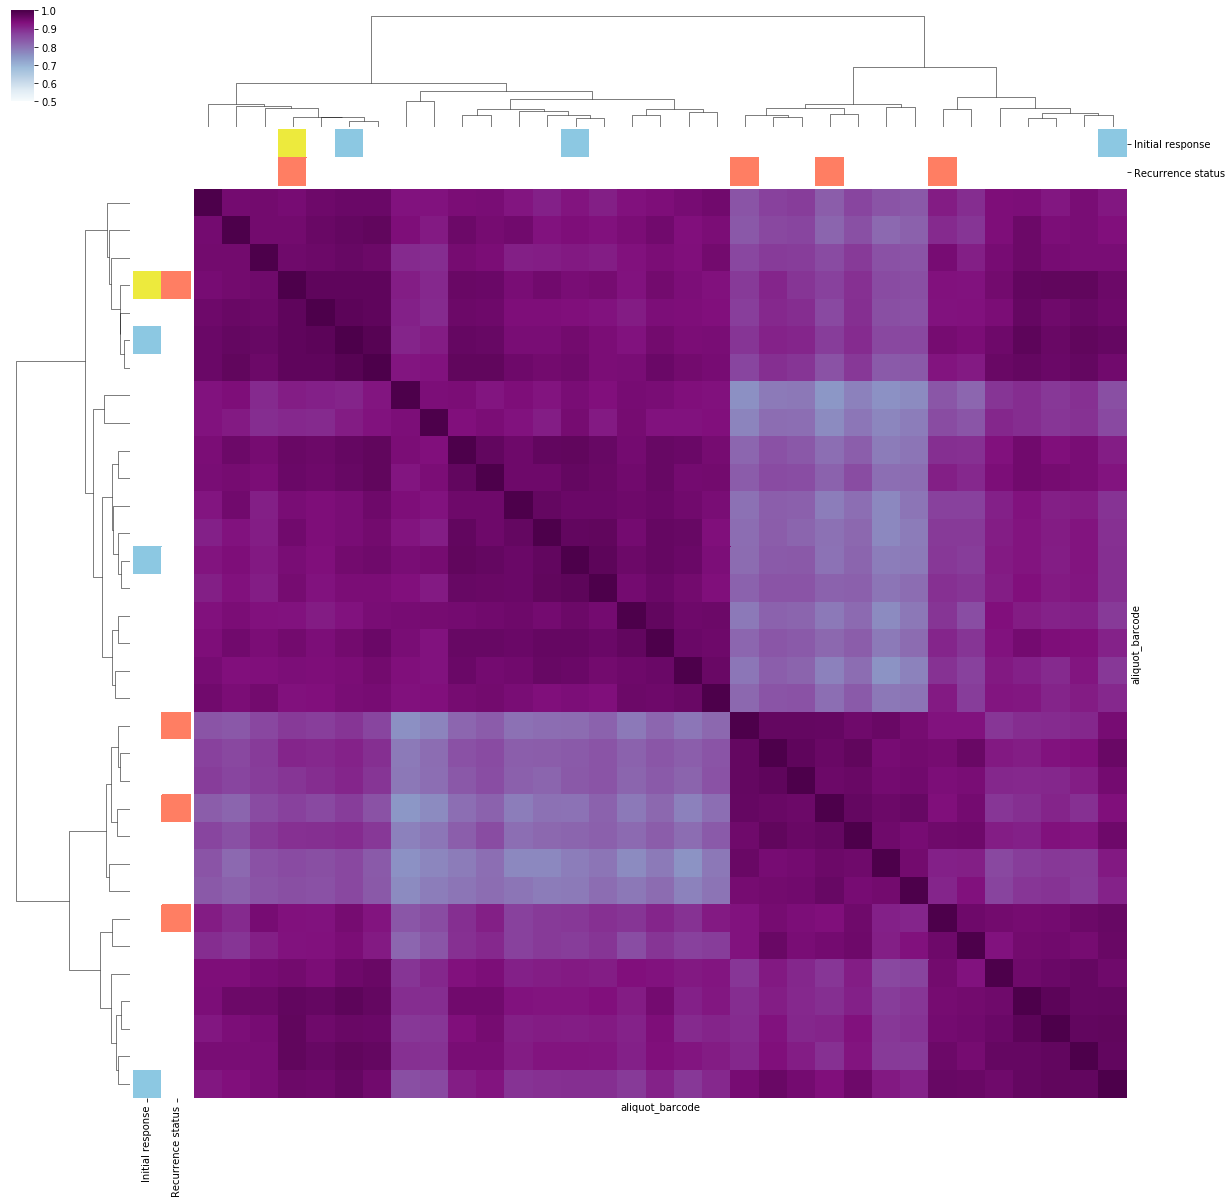

In [35]:
distance = scipy.spatial.distance.squareform(1-expression_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='complete')

gg = sns.clustermap(data=expression_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix, col_colors = color_matrix,
                   cmap="BuPu", vmin=0.5, vmax=1, figsize=(20,20), 
                   xticklabels=False, yticklabels=False)